# How much of the inter-hospital variation in thrombolysis use do in-hospital processes explain

Aims:

* Investigate the correlation (explained variance) between hospital model process parameters and the variation in use of thrombolysis between hospitals.

## Load data and pivot by scenario

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
scenarios = pd.read_csv('output/key_scenario_results.csv')

# Performance data
performance = pd.read_csv(
    'hosp_performance_output/hospital_performance.csv', index_col='stroke_team')

performance['hosp_speed'] = (
    np.exp(performance['arrival_scan_arrival_mins_mu']) +
    np.exp(performance['scan_needle_mins_mu']))

# Decision data
decision =  pd.read_csv(
    '../random_forest/predictions/corhort_rates.csv', index_col='hospital')

In [2]:
scenarios.head()

,stroke_team,scenario,admissions,thrombolysis_rate,additional_good_outcomes_per_1000_patients,patients_receiving_thrombolysis,add_good_outcomes
0,AGNOF1041H,base,671.666667,15.11,12.72,101.488833,8.543600
1,AKCGO9726K,base,1143.333333,15.06,13.43,172.186000,15.354967
2,AOBTM3098N,base,500.666667,7.81,5.74,39.102067,2.873827
3,APXEE8191H,base,439.333333,10.08,7.35,44.284800,3.229100
4,ATDID5461S,base,275.666667,9.20,6.42,25.361333,1.769780


In [3]:
performance.head()

,thrombolysis_rate,admissions,80_plus,onset_known,known_arrival_within_4hrs,onset_arrival_mins_mu,onset_arrival_mins_sigma,scan_within_4_hrs,arrival_scan_arrival_mins_mu,arrival_scan_arrival_mins_sigma,onset_scan_4_hrs,eligable,scan_needle_mins_mu,scan_needle_mins_sigma,hosp_speed
stroke_team,,,,,,,,,,,,,,,
AGNOF1041H,0.154839,671.666667,0.425459,0.635236,0.681250,4.576874,0.557598,0.965596,1.665700,1.497966,0.935867,0.388325,3.669602,0.664462,44.525658
AKCGO9726K,0.158892,1143.333333,0.395658,0.970845,0.428829,4.625486,0.597451,0.955882,2.834183,0.999719,0.908425,0.419355,2.904479,0.874818,35.272215
AOBTM3098N,0.085885,500.666667,0.485470,0.619174,0.629032,4.603918,0.584882,0.935043,3.471419,1.254744,0.846435,0.267819,3.694918,0.518929,72.424682
APXEE8191H,0.098634,439.333333,0.515679,0.716237,0.608051,4.590357,0.496452,0.966899,3.312930,0.714465,0.904505,0.258964,3.585094,0.751204,63.522230
ATDID5461S,0.090689,275.666667,0.533546,0.573156,0.660338,4.427826,0.591373,0.878594,4.125690,0.549301,0.865455,0.315126,3.497262,0.608126,94.935429


In [4]:
rx = scenarios.pivot(
    index='stroke_team', columns='scenario', values='thrombolysis_rate')

In [5]:
rx = rx.merge(performance[['hosp_speed', 'onset_known']], left_index=True, right_index=True)
rx = rx.merge(decision['cohort_rate'], left_index=True, right_index=True)

In [6]:
rx.head()

,base,benchmark,onset,onset_benchmark,same_patient_characteristics,speed,speed_benchmark,speed_onset,speed_onset_benchmark,hosp_speed,onset_known,cohort_rate
AGNOF1041H,15.11,20.38,18.17,24.09,11.04,15.21,20.14,17.89,23.90,44.525658,0.635236,27.76
AKCGO9726K,15.06,14.18,14.92,14.27,22.22,15.32,14.69,15.36,14.83,35.272215,0.970845,37.45
AOBTM3098N,7.81,11.88,9.39,14.52,8.74,9.39,13.78,11.40,17.17,72.424682,0.619174,26.00
APXEE8191H,10.08,13.06,10.76,13.35,13.24,10.15,12.80,10.90,13.54,63.522230,0.716237,29.97
ATDID5461S,9.20,9.92,11.81,13.35,7.60,11.10,11.79,14.64,15.95,94.935429,0.573156,25.92


## Calculate difference between each hospital's thrombolysis rate and the mean thrombolysis

In [7]:
mean_rx = rx['base'].mean()
print (f'Mean thrombolysis: {mean_rx:0.2f}')

rx['diff_from_mean'] = rx['base'] - mean_rx

Mean thrombolysis: 11.22


In [8]:
rx.head()

,base,benchmark,onset,onset_benchmark,same_patient_characteristics,speed,speed_benchmark,speed_onset,speed_onset_benchmark,hosp_speed,onset_known,cohort_rate,diff_from_mean
AGNOF1041H,15.11,20.38,18.17,24.09,11.04,15.21,20.14,17.89,23.90,44.525658,0.635236,27.76,3.889545
AKCGO9726K,15.06,14.18,14.92,14.27,22.22,15.32,14.69,15.36,14.83,35.272215,0.970845,37.45,3.839545
AOBTM3098N,7.81,11.88,9.39,14.52,8.74,9.39,13.78,11.40,17.17,72.424682,0.619174,26.00,-3.410455
APXEE8191H,10.08,13.06,10.76,13.35,13.24,10.15,12.80,10.90,13.54,63.522230,0.716237,29.97,-1.140455
ATDID5461S,9.20,9.92,11.81,13.35,7.60,11.10,11.79,14.64,15.95,94.935429,0.573156,25.92,-2.020455


## How much variation is explained by differences in decision making?

In [9]:
diff_explained_by_decison_making = (np.corrcoef(
    rx['cohort_rate'], rx['diff_from_mean'])[1,0]) ** 2

print(f'{diff_explained_by_decison_making:0.3}')

0.399


## How much variation is explained by differences in speed?

In [10]:
diff_explained_by_speed = (np.corrcoef(
    rx['diff_from_mean'], rx['hosp_speed'])[1,0]) ** 2

print(f'{diff_explained_by_speed:0.3}')

0.254


## How much variation is explained by determination of stroke onset time?

In [11]:
diff_explained_by_determination_of_onset = (np.corrcoef(
    rx['diff_from_mean'], rx['onset_known'])[1,0]) ** 2

print(f'{diff_explained_by_determination_of_onset:0.3}')

0.0474


## Plot relationships

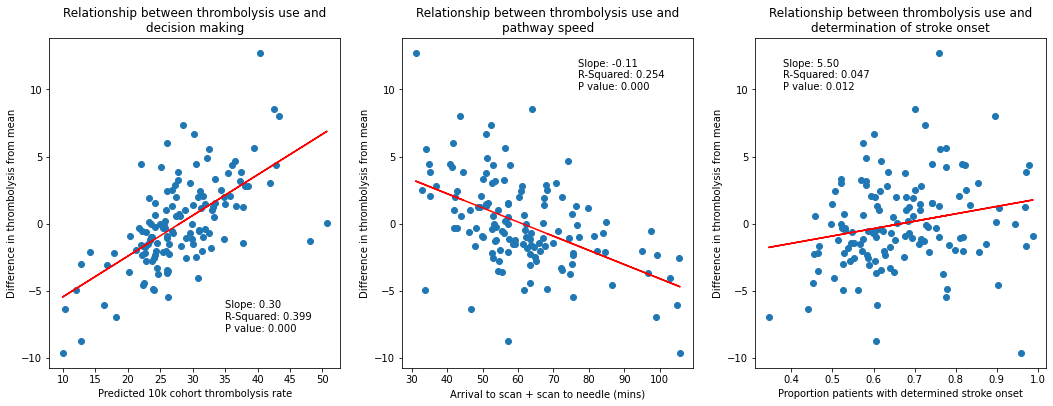

In [12]:
from scipy import stats
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(131)
x = rx['cohort_rate']
y = rx['diff_from_mean']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_fit=intercept + (x*gradient)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, y_fit, 'r', label='fitted line')
text='Slope: %.2f\nR-Squared: %.3f\nP value: %.3f' %(gradient,r_value**2,p_value)
plt.text(35, -8, text)
ax1.set_title('Relationship between thrombolysis use and\ndecision making')
ax1.set_xlabel('Predicted 10k cohort thrombolysis rate')
ax1.set_ylabel('Difference in thrombolysis from mean')

ax2 = fig.add_subplot(132)
x = rx['hosp_speed']
y = rx['diff_from_mean']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_fit=intercept + (x*gradient)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, y_fit, 'r', label='fitted line')
text='Slope: %.2f\nR-Squared: %.3f\nP value: %.3f' %(gradient,r_value**2,p_value)
plt.text(77, 10, text)
ax2.set_title('Relationship between thrombolysis use and\npathway speed')
ax2.set_xlabel('Arrival to scan + scan to needle (mins)')
ax2.set_ylabel('Difference in thrombolysis from mean')

ax3 = fig.add_subplot(133)
x = rx['onset_known']
y = rx['diff_from_mean']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_fit=intercept + (x*gradient)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, y_fit, 'r', label='fitted line')
text='Slope: %.2f\nR-Squared: %.3f\nP value: %.3f' %(gradient,r_value**2,p_value)
plt.text(0.38,10, text)
ax3.set_title('Relationship between thrombolysis use and\ndetermination of stroke onset')
ax3.set_xlabel('Proportion patients with determined stroke onset')
ax3.set_ylabel('Difference in thrombolysis from mean')


plt.tight_layout(pad=2)
plt.savefig('./output/model_correlations.jpg', dpi=300)
plt.show()

## Conclusions

* In-hospital process parameters partly explain the inter-hospital variation in thrombolysis use.

* The strongest relationship is between decision-making, as described by the predicted thrombolysis use of a standard 10k cohort of patients, with R-square of 0.40.

* Pathway speed is the next strongest predictor of thrombolysis use, with an R-square of 0.25.

* Determination of stroke onset time is the weakest predictor of thrombolysis use (R-square of 0.05), but is still statistically significant (p=0.012)